In [1]:
import cv2
from deepface import DeepFace
import pylab as plt

In [127]:
img=cv2.imread("8.jpg")

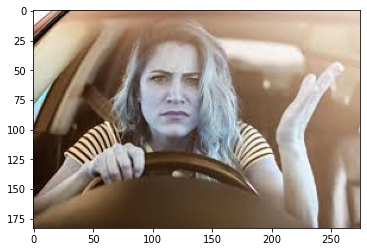

In [128]:
plt.imshow(img)

1/1 [==============================] - 0s 233ms/step


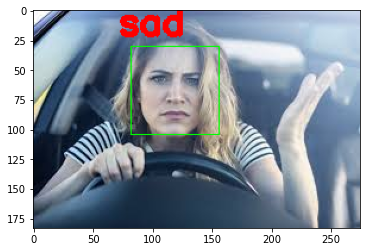

In [129]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces= faceCascade.detectMultiScale(gray,1.1,4)
res=DeepFace.analyze(img, actions=['emotion'])
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1) 
    cv2.putText(img, res['dominant_emotion'],(x-10,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),cv2.LINE_4)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [114]:
res=DeepFace.analyze(img)

Action: emotion:   0%|                                                                           | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 78ms/step


Action: age:  25%|█████████████████▊                                                     | 1/4 [00:00<00:00,  3.36it/s]

1/1 [==============================] - 48s 48s/step


Action: gender:  50%|██████████████████████████████████                                  | 2/4 [00:49<00:57, 28.80s/it]

1/1 [==============================] - 8s 8s/step


Action: race:  75%|████████████████████████████████████████████████████▌                 | 3/4 [00:56<00:19, 19.26s/it]

1/1 [==============================] - 20s 20s/step


Action: race: 100%|██████████████████████████████████████████████████████████████████████| 4/4 [01:17<00:00, 19.31s/it]


In [76]:
res

{'emotion': {'angry': 2.45716549200806,
  'disgust': 0.0018563666541548127,
  'fear': 42.49687746148571,
  'happy': 0.04420927407163525,
  'sad': 13.540098878151111,
  'surprise': 0.0006048268820795188,
  'neutral': 41.459193316649994},
 'dominant_emotion': 'fear',
 'region': {'x': 102, 'y': 42, 'w': 66, 'h': 66},
 'age': 32,
 'gender': 'Man',
 'race': {'asian': 23.872219026088715,
  'indian': 5.630960687994957,
  'black': 1.211257465183735,
  'white': 33.01565945148468,
  'middle eastern': 14.686886966228485,
  'latino hispanic': 21.583019196987152},
 'dominant_race': 'white'}

In [77]:
res['dominant_emotion']

'fear'

In [8]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

1/1 [==============================] - 0s 47ms/step


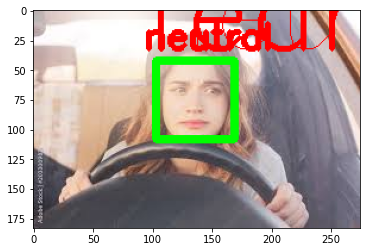

In [82]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces= faceCascade.detectMultiScale(gray,1.1,4)
res=DeepFace.analyze(img, actions=['emotion'])
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1) 
    cv2.putText(img, res['dominant_emotion'],(x-10,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),cv2.LINE_4)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

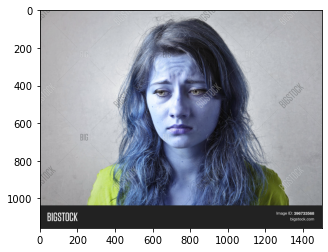

In [10]:
img2=cv2.imread('sad.jpg')
plt.imshow(img2)

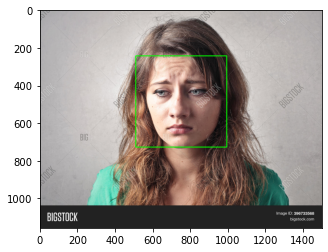

In [12]:
gray=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
faces= faceCascade.detectMultiScale(gray,1.1,4)
for (x,y,w,h) in faces:
    cv2.rectangle(img2,(x,y),(x+w,y+h),(0,255,0),4)
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))

In [11]:
predict2=DeepFace.analyze(img2,actions=['emotion'])

1/1 [==============================] - 2s 2s/step


In [13]:
predict2['dominant_emotion']

'sad'

## Real live demo for emotion detection

In [3]:
import cv2
import numpy as np
import face_recognition
import os
from deepface import DeepFace

In [2]:
path = r'C:\Users\JOKER\Documents\Face_exp\CSE-1A PHOTOS'
images = []
classNames = []
myList = os.listdir(path)
print(myList)
for cl in myList:
    curImg = cv2.imread(f'{path}/{cl}')
    images.append(curImg)
    classNames.append(os.path.splitext(cl)[0])
print(classNames)

['S170001.jpg', 'S170022.jpg', 's170033.JPG', 's170034.JPG', 's170044.JPG', 'S170076.jpg', 's170078.JPG', 'S170102.jpg', 's170107.JPG', 'S170121.jpg', 'S170155.jpg', 's170159.JPG', 'S170162.jpg', 'S170172.jpg', 'S170177.jpg', 's170201.JPG', 'S170209.jpg', 's170249.JPG', 'S170259.jpg', 's170338.JPG', 's170341.JPG', 's170347.JPG', 's170372.JPG', 's170389.JPG', 'S170397.jpg', 's170415.JPG', 's170423.JPG', 's170428.JPG', 'S170435.jpg', 'S170451.jpg', 's170457.JPG', 'S170463.jpg', 's170468.JPG', 'S170469.jpg', 's170503.JPG', 's170520.JPG', 's170527.JPG', 's170553.JPG', 'S170555.jpg', 's170560.JPG', 'S170599.JPG', 'S170600.jpg', 's170669.JPG', 's170710.JPG', 'S170711.jpg', 'S170731.jpg', 's170739.JPG', 's170741.JPG', 's170761.JPG', 'S170765.jpg', 's170810.JPG', 's170837.JPG', 'S170904.jpg', 'S170945.jpg', 'S170956.jpg', 'S170986.jpg', 's171003.jpg', 's171033.JPG', 'S171100.jpg', 's171120.JPG']
['S170001', 'S170022', 's170033', 's170034', 's170044', 'S170076', 's170078', 'S170102', 's170107',

In [3]:
def findEncodings(images):
    encodeList = []
    for img in images:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(img)[0]
        encodeList.append(encode)
    return encodeList
encodeListKnown = findEncodings(images)

In [14]:
import cv2
import numpy as np
import face_recognition
import os
from deepface import DeepFace

faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
font=cv2.FONT_HERSHEY_SIMPLEX
def exp():
    ret,frame= cap.read()
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces= faceCascade.detectMultiScale(gray,1.1,4)
    if(len(faces)!=0):
        res=DeepFace.analyze(frame, actions=['emotion'])
        for (x,y,w,h) in faces:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),1) 
            cv2.putText(frame, res['dominant_emotion'],(x-10,y-10),font,3,(0,0,255),cv2.LINE_4)
        print(res['dominant_emotion'])
    cv2.imshow('testing emotions',frame)       
cap=cv2.VideoCapture(0)
while True:
    try:
        exp()
    except:
        print("no face found")
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 38ms/step
angry
1/1 [==============================] - 0s 38ms/step
neutral
no face found
1/1 [==============================] - 0s 93ms/step
neutral
no face found
1/1 [==============================] - 0s 54ms/step
neutral
1/1 [==============================] - 0s 38ms/step
fear
1/1 [==============================] - 0s 87ms/step
neutral
no face found
1/1 [==============================] - 0s 51ms/step
neutral
1/1 [==============================] - 0s 38ms/step
neutral
1/1 [==============================] - 0s 32ms/step
happy
1/1 [==============================] - 0s 40ms/step
happy
1/1 [==============================] - 0s 48ms/step
neutral
1/1 [==============================] - 0s 29ms/step
neutral
1/1 [==============================] - 0s 41ms/step
neutral
1/1 [==============================] - 0s 38ms/step
happy
1/1 [==============================] - 0s 29ms/step
angry
1/1 [==============================] - 0s 30ms/step
angry
1/1 [========

1/1 [==============================] - 0s 50ms/step
happy
1/1 [==============================] - 0s 51ms/step
neutral
1/1 [==============================] - 0s 63ms/step
neutral
1/1 [==============================] - 0s 38ms/step
neutral
no face found
1/1 [==============================] - 0s 28ms/step
neutral
1/1 [==============================] - 0s 41ms/step
neutral
no face found
no face found
1/1 [==============================] - 0s 40ms/step
neutral
1/1 [==============================] - 0s 59ms/step
neutral
1/1 [==============================] - 0s 63ms/step
sad
1/1 [==============================] - 0s 38ms/step
sad
no face found
1/1 [==============================] - 0s 28ms/step
sad
1/1 [==============================] - 0s 66ms/step
sad
1/1 [==============================] - 0s 31ms/step
neutral
1/1 [==============================] - 0s 51ms/step
neutral
1/1 [==============================] - 0s 41ms/step
neutral
no face found
no face found
1/1 [=============================

In [8]:
# for every 5 sec
import time
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
font=cv2.FONT_HERSHEY_SIMPLEX
cap=cv2.VideoCapture(0)
def exp():
    ret,frame= cap.read()
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces= faceCascade.detectMultiScale(gray,1.1,4)
    if(len(faces)!=0):
        res=DeepFace.analyze(frame, actions=['emotion'])
        for (x,y,w,h) in faces:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),1) 
            cv2.putText(frame, res['dominant_emotion'],(x-10,y-10),font,3,(0,0,255),cv2.LINE_4)
        print(res['dominant_emotion'])
    cv2.imshow('testing emotions',frame)

while(cap.isOpened()):
    try:
        exp()
    except:
        print("no face found")
    #time.sleep(2)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 69ms/step
angry
1/1 [==============================] - 0s 31ms/step
neutral
no face found
1/1 [==============================] - 0s 30ms/step
neutral
1/1 [==============================] - 0s 43ms/step
sad
no face found
1/1 [==============================] - 0s 73ms/step
sad
no face found
no face found
no face found
1/1 [==============================] - 0s 30ms/step
sad
1/1 [==============================] - 0s 53ms/step
sad
1/1 [==============================] - 0s 61ms/step
neutral
1/1 [==============================] - 0s 47ms/step
neutral
1/1 [==============================] - 0s 59ms/step
neutral
1/1 [==============================] - 0s 63ms/step
happy
1/1 [==============================] - 0s 386ms/step
happy
1/1 [==============================] - 0s 69ms/step
sad
no face found
1/1 [==============================] - 0s 30ms/step
happy
1/1 [==============================] - 0s 58ms/step
happy
1/1 [==============================] - 0s 30m

In [4]:
'''cap=cv2.VideoCapture(0)
while True:
    a,img=cap.read()
    faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    faces=faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        ray=gray[y:y+h,x:x+w]
        ray1=img[y:y+h,x:x+w]
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
        faces=faceCascade.detectMultiScale(ray)
        if len(faces)==0:
            print("faces not found")
        else:
            for ex,ey,ew,eh in faces:
                face_ray=ray1[ey:ey+eh,ex:ex+ew]
    print(model.predict(img))
    if cv2.waitKey(1) & 0xff==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()'''

NameError: name 'model' is not defined

In [5]:
cap.release()